In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import sklearn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as scs
%matplotlib inline

In [2]:
#Function to draw a stacked or segmented bar graph
def stacked_bar(cat=None,hue=None,data=None,segmented=True, orient="h"):
    #normalize counts if segmented
    if segmented:
        pd.crosstab(data[cat],data[hue],normalize="index").plot(kind="bar"+orient,stacked=True).set(xlabel="percent")
    else:
        pd.crosstab(data[cat],data[hue]).plot(kind="bar"+orient,stacked=True)
    #move legend to avoid covering plot
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    

# Adult Income Dataset

In [3]:
#read file into dataframe
adult = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",header=None, 
                 names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation',
                       'relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income'],
                   na_values=[" ?"])

In [4]:
#list categorical columns
categorical_columns = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country','income']
#strip whitespace and convert to categorical dtype
adult[categorical_columns] = adult[categorical_columns].apply(lambda x: x.str.strip()).astype('category')

#define order for education level
education_level = CategoricalDtype(categories = ['Preschool' , '1st-4th' , '5th-6th ', '7th-8th' , '9th' , '10th' , '11th' , '12th' , 'HS-grad' , 'Prof-school' , 'Assoc-acdm' , 'Assoc-voc' , 'Some-college' , 'Bachelors' , 'Masters' , 'Doctorate'], ordered=True)
adult.education = adult.education.astype(education_level)
#define order for income
income_level = CategoricalDtype(categories = ['<=50K','>50K'], ordered=True)
adult.income = adult.income.astype(income_level)

adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
adult.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education          333
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [6]:
adult.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


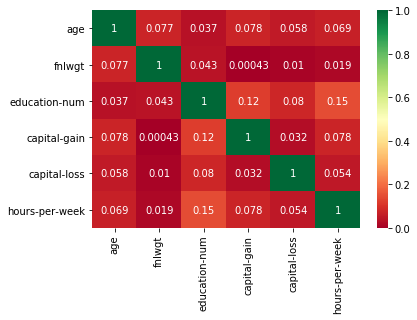

In [7]:
#Heatmap of correlations between numeric columns
sns.heatmap(adult.corr(method="pearson").abs(),annot=True, cmap="RdYlGn")

In [8]:
adult['education-num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

### Visualization

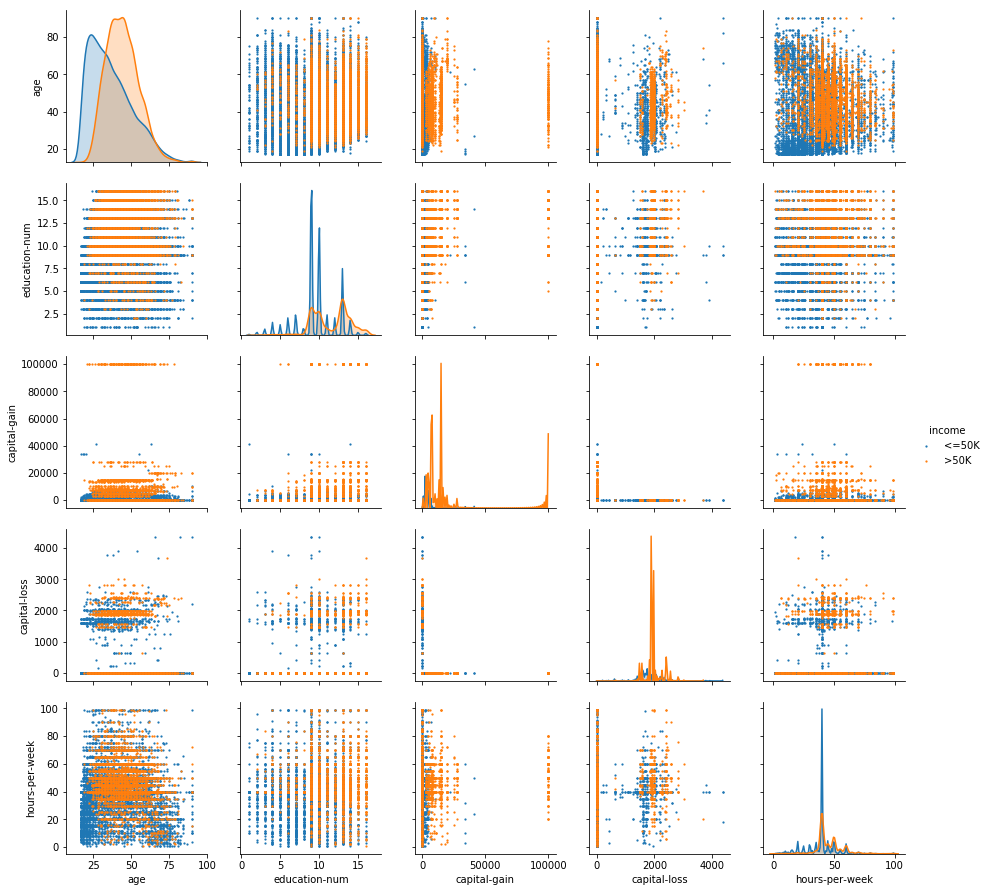

In [9]:
sns.pairplot(adult.drop('fnlwgt',axis=1), hue='income',plot_kws=dict(s=5, linewidth=0))

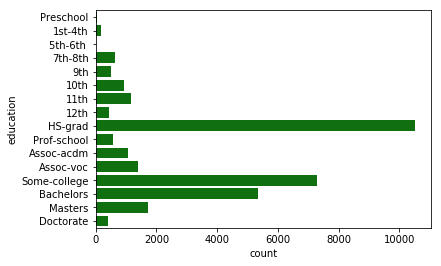

In [10]:
sns.countplot(y='education',data=adult, color="g")

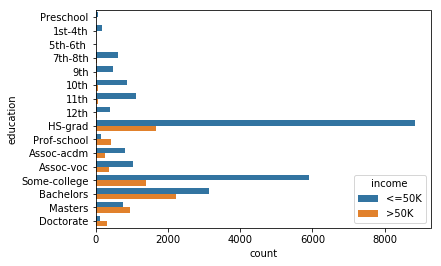

In [11]:
sns.countplot(y='education', hue='income', data=adult)

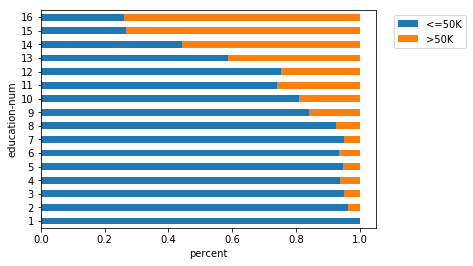

In [12]:
stacked_bar(cat='education-num',hue='income',data=adult)

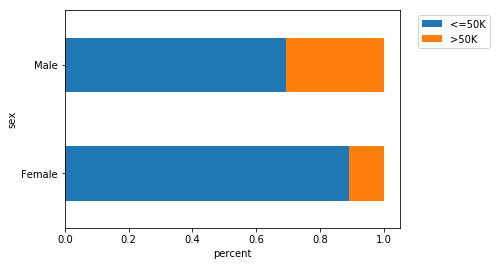

In [13]:
stacked_bar(cat='sex',hue='income',data=adult)

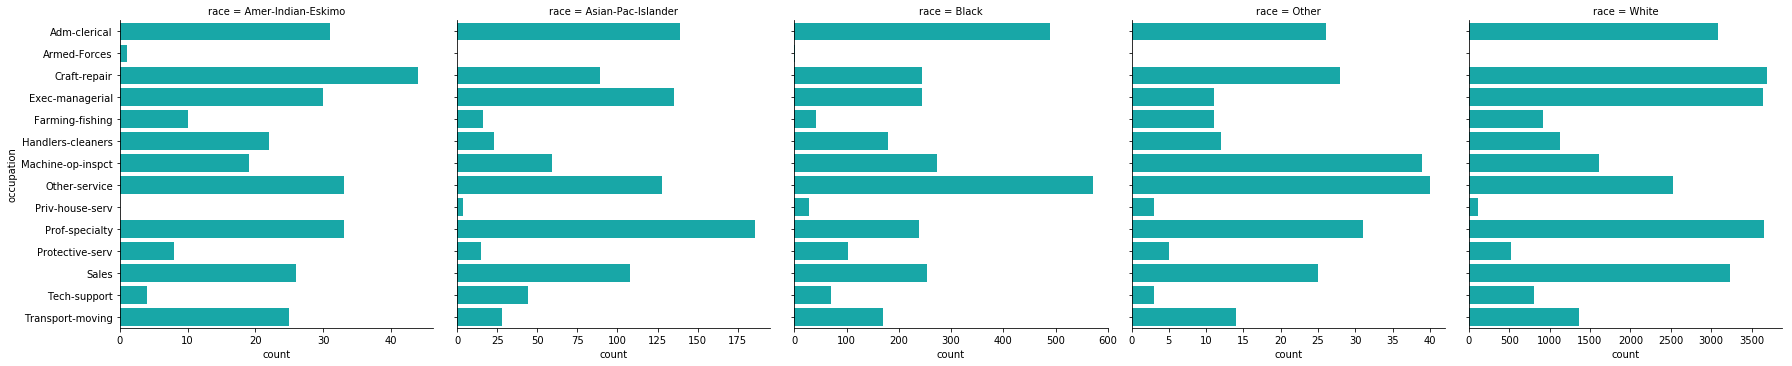

In [14]:
sns.catplot(y='occupation', col='race', data=adult, kind="count",sharex=False, color="c")

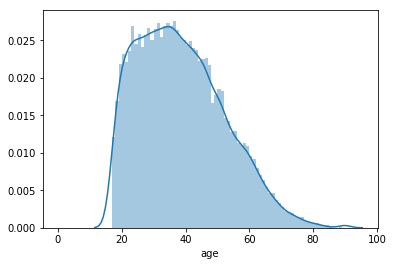

In [15]:
sns.distplot(adult.age,bins=range(90))

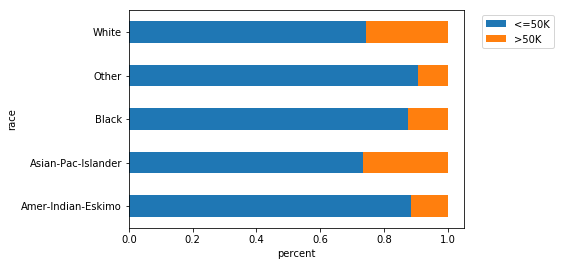

In [16]:
stacked_bar(cat='race',hue='income',data=adult)

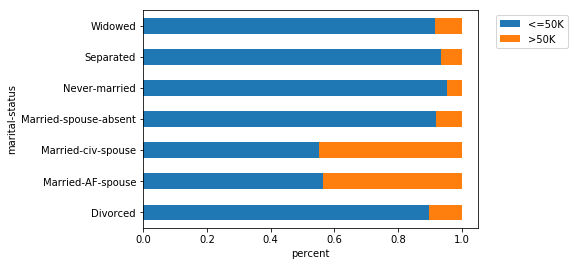

In [17]:
stacked_bar(cat='marital-status',data=adult,hue='income')

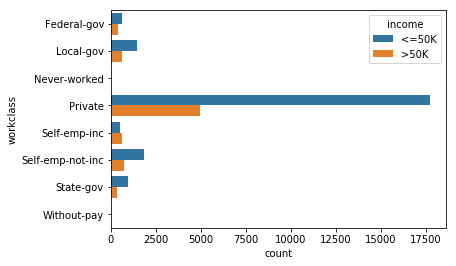

In [18]:
sns.countplot(y='workclass',data=adult,hue='income')

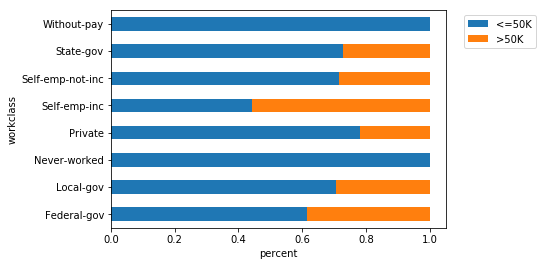

In [19]:
stacked_bar(cat='workclass',hue='income',data=adult)

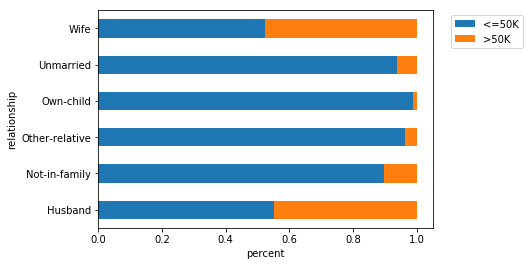

In [20]:
stacked_bar(cat='relationship',hue='income',data=adult)

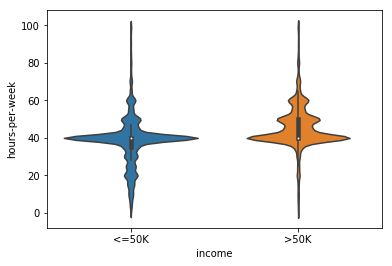

In [21]:
sns.violinplot(x=adult['income'],y=adult['hours-per-week'])

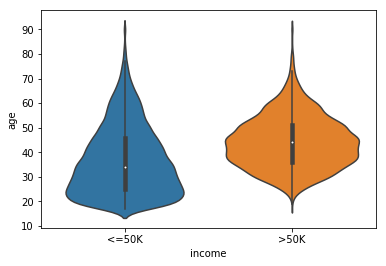

In [22]:
sns.violinplot(x=adult.income,y=adult.age)

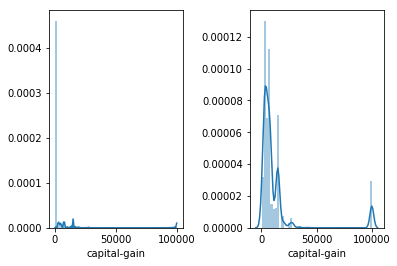

In [24]:
f, ax = plt.subplots(1,2,gridspec_kw={"wspace":0.5})

#entire plot
sns.distplot(adult.loc[:,"capital-gain"], ax=ax[0])
#plot with zeros removed
sns.distplot(adult.loc[adult["capital-gain"]>0,"capital-gain"], ax=ax[1])

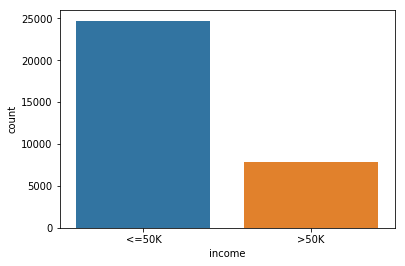

In [25]:
sns.countplot(adult.income)

### Feature Selection

#### Categorical Data (Chi Square Test)

Run a Chi Square Test between each categorical variable and income level

In [26]:
#print header
print("Column:\tP Value\n")
#for all categorical columns
for col in adult.columns:
    if pd.api.types.is_categorical_dtype(adult[col]):
        #generate contingency table for col and income, and compute p value using chi2 test
        print(col,": ",scs.chi2_contingency(pd.crosstab(adult[col],adult.income))[1])

Column:	P Value

workclass :  1.9338476684848218e-174
education :  0.0
marital-status :  0.0
occupation :  0.0
relationship :  0.0
race :  2.305960610160958e-70
sex :  0.0
native-country :  8.280446050912632e-45
income :  0.0


#### Quantitative Data (2 Sample T Test)

Run a 2 Sample T Test between different income levels for each quantitative variable

In [27]:
#print header
print("Column:\tP Value\n")
#for all numeric columns
for col in adult.columns:
    if not pd.api.types.is_categorical_dtype(adult[col]):
        #Run t test between low income and high income subsets of col
        print(col,": ",scs.ttest_ind(adult.loc[adult.income == '<=50K',col], adult.loc[adult.income == '>50K',col])[1])

Column:	P Value

age :  0.0
fnlwgt :  0.08773666108063947
education-num :  0.0
capital-gain :  0.0
capital-loss :  2.68654718905867e-164
hours-per-week :  0.0


### Preprocessing

In [28]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [29]:
#Apply log scale to highly skewed columns
adult['log-capital-gains'] = np.log(adult['capital-gain']+1)
adult['log-capital-loss'] = np.log(adult['capital-loss']+1)

#Seaprate predictor and target variables (remove redundant/irrelevant columns)
X = adult.drop(columns=['fnlwgt','education','income','capital-gain','capital-loss'])
y = adult.income

#encode target column (incomes)
y = LabelEncoder().fit_transform(y)

#split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#create lists of numeric and categorical columns
cat_cols = [col for col in X_train.columns if pd.api.types.is_categorical_dtype(adult[col])]
num_cols = [col for col in X_train.columns if not pd.api.types.is_categorical_dtype(adult[col])]

In [30]:
#Create pipeline to impute and scale numeric columns
num_imputer = ('ni',SimpleImputer(strategy='median'))
scaler = ('ss', MinMaxScaler())
num_pipe = Pipeline([num_imputer,scaler])

#create pipeline to impute and encode categorical columns
cat_imputer = ('ci',SimpleImputer(strategy="constant",fill_value="MISSING"))
encoder = ('ohe', OneHotEncoder())
cat_pipe = Pipeline([cat_imputer,encoder])

#pass pipelines into column transformer
transformers = [('cat', cat_pipe, cat_cols), ('num', num_pipe, num_cols)]
ct = ColumnTransformer(transformers=transformers)

#fit to training data and transform
X_train = ct.fit_transform(X_train)
#transform test data
X_test = ct.transform(X_test)

### Logistic Regression Model

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

C:\Users\seyon\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from 'C:\\Users\\seyon\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

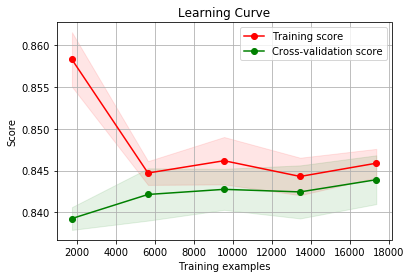

In [33]:
#train logistic regression model and plot cost 
clf = LogisticRegression(solver="lbfgs",max_iter=1000)
plot_learning_curve(clf,X=X_train,y=y_train, title="Learning Curve")

In [34]:
clf.fit(X_train,y_train)
pred_clf = clf.predict(X_test)
print(classification_report(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4942
           1       0.73      0.61      0.66      1571

   micro avg       0.85      0.85      0.85      6513
   macro avg       0.81      0.77      0.78      6513
weighted avg       0.85      0.85      0.85      6513



In [35]:
pd.DataFrame(confusion_matrix(y_test,pred_clf),index=[1,0],columns=[1,0])

,1,0
1,4597,345
0,618,953


In [36]:
print(sklearn.metrics.accuracy_score(y_test,pred_clf))

0.852141870105942


In [37]:
1-y_test.mean()

0.7587901120835252

Text(0.5, 1.0, 'ROC Curve')

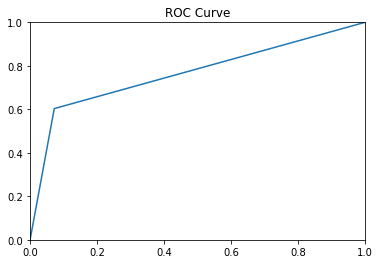

In [58]:
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test,pred_clf)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title("ROC Curve")

In [59]:
print(sklearn.metrics.roc_auc_score(y_test,pred_clf))

0.7655996703710851


# Credit Dataset

In [39]:
credit = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data",header=None,
                 names=['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','A16'],
                    na_values=["?"])
credit.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [60]:
credit.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

# Default Dataset

In [41]:
default = pd.read_excel("http://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls",header=1,index_col=0)
default.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [61]:
default.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64